In [454]:
import numpy as np
import matplotlib.pyplot as plt

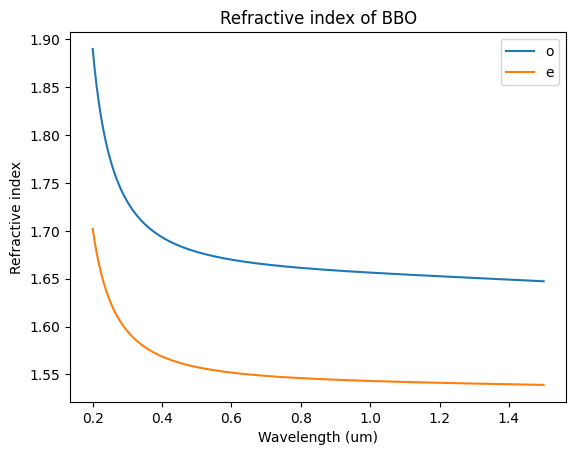

In [455]:
def bbo_sellmeier_n(wavelength, axis='o'):
    """
    Sellmeier equation for BBO crystal
    https://refractiveindex.info
    Eimerl et al., 1987
    """
    if axis == 'o':
        A = 2.7405
        B = 0.0184
        C = 0.0179
        D = 0.0155
    elif axis == 'e':
        A = 2.3730
        B = 0.0128
        C = 0.0156
        D = 0.0044

    n2 = A + B / (wavelength**2 - C) - D * wavelength**2
    return np.sqrt(n2)

# plot the refractive index of BBO 
wavelength = np.linspace(0.2, 1.5, 1000)
n_o = bbo_sellmeier_n(wavelength, 'o')
n_e = bbo_sellmeier_n(wavelength, 'e')
plt.plot(wavelength, n_o)
plt.plot(wavelength, n_e)
plt.legend(['o', 'e'])
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index')
plt.title('Refractive index of BBO')
plt.show()


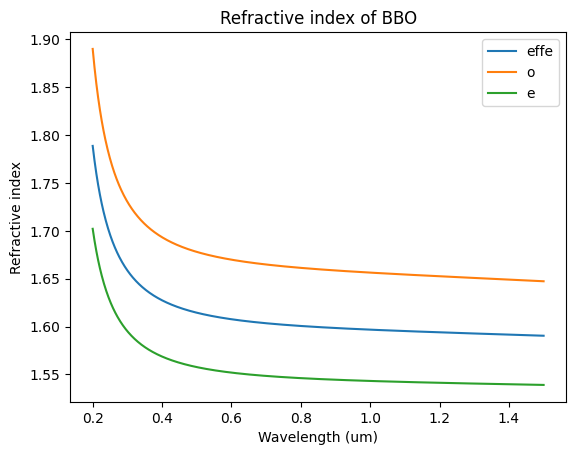

In [520]:

# plot the refractive index of BBO 
wavelength = np.linspace(0.2, 1.5, 1000)
n_o = bbo_sellmeier_n(wavelength, 'o')
n_e = bbo_sellmeier_n(wavelength, 'e')
n_eff = 1 / np.sqrt(1 / (2*n_o**2) + 1 / (2*n_e**2))
plt.plot(wavelength, n_eff, label='effe')
plt.plot(wavelength, n_o, label='o')
plt.plot(wavelength, n_e, label='e')
plt.legend()
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index')
plt.title('Refractive index of BBO')
plt.show()

In [456]:
bbo_sellmeier_n(1.0140, 'e')

np.float64(1.543086748817361)

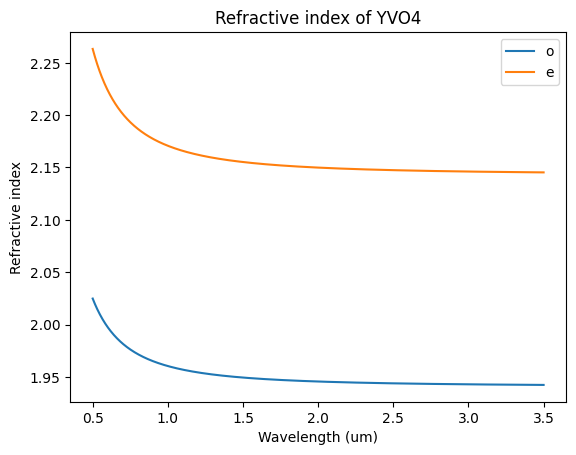

In [457]:
def yvo_sellmeier_n(wavelength, axis='o'):
    """
    Sellmeier equation for YVO4 crystal
    https://refractiveindex.info
    Birnbaum et al., 1976
    """
    if axis == 'o':
        A = 1
        B = 2.7665
        C = 0.026884
    elif axis == 'e':
        A = 1
        B = 3.5930
        C = 0.032103
    n2 = A + B * wavelength**2 / (wavelength**2 - C)
    return np.sqrt(n2)

# plot the refractive index of YVO4
wavelength = np.linspace(0.5, 3.5, 1000)
n_o = yvo_sellmeier_n(wavelength, 'o')
n_e = yvo_sellmeier_n(wavelength, 'e')
plt.plot(wavelength, n_o)
plt.plot(wavelength, n_e)
plt.legend(['o', 'e'])
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index')
plt.title('Refractive index of YVO4')
plt.show()

# Pre compensation

In [458]:
pump_wavelength = 0.405 # um
signal_wavelength = np.linspace(0.700, 0.900, 1000) # um
idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

In [459]:
n_o_pump_bbo = bbo_sellmeier_n(pump_wavelength, 'o')
n_e_pump_bbo = bbo_sellmeier_n(pump_wavelength, 'e')

n_o_pump_bbo, n_e_pump_bbo

(np.float64(1.6922993830562731), np.float64(1.5679659215574717))

In [460]:
n_o_signal_bbo = bbo_sellmeier_n(signal_wavelength, 'o')
n_e_signal_bbo = bbo_sellmeier_n(signal_wavelength, 'e')
n_o_idler_bbo = bbo_sellmeier_n(idler_wavelength, 'o')
n_e_idler_bbo = bbo_sellmeier_n(idler_wavelength, 'e')


In [461]:
bbo_1_length = 13e3 # um
bbo_2_length = 13.76e3 # um

In [462]:
phase_difference_bbo_1 = 2 * np.pi * bbo_1_length * (n_o_pump_bbo - n_e_pump_bbo) / pump_wavelength
phase_difference_bbo_1

np.float64(25075.882272199065)

In [463]:
n_o_pump_yvo4 = yvo_sellmeier_n(pump_wavelength, 'o')
n_e_pump_yvo4 = yvo_sellmeier_n(pump_wavelength, 'e')

In [464]:
required_yvo4_length_pre_compensation = phase_difference_bbo_1 / (2 * np.pi) * pump_wavelength / (n_e_pump_yvo4 - n_o_pump_yvo4) 
required_yvo4_length_pre_compensation / 1e3 # mm

np.float64(6.158254561674315)

Actual pre compensation YVO4 length = 0.78mm

# Post compensation

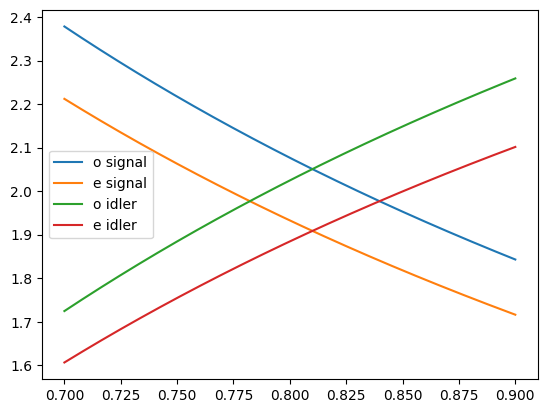

In [465]:
# plot n_o_signal
plt.plot(signal_wavelength, n_o_signal_bbo / signal_wavelength)
plt.plot(signal_wavelength, n_e_signal_bbo / signal_wavelength)
plt.plot(signal_wavelength, n_o_idler_bbo / idler_wavelength)
plt.plot(signal_wavelength, n_e_idler_bbo / idler_wavelength)
plt.legend(['o signal', 'e signal', 'o idler', 'e idler'])

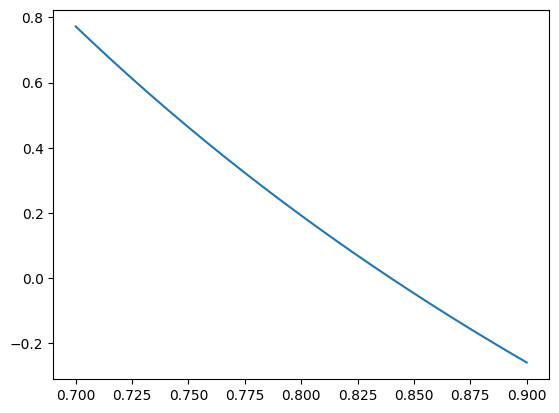

In [466]:
plt.plot(signal_wavelength, n_o_signal_bbo / signal_wavelength - n_e_idler_bbo / idler_wavelength)

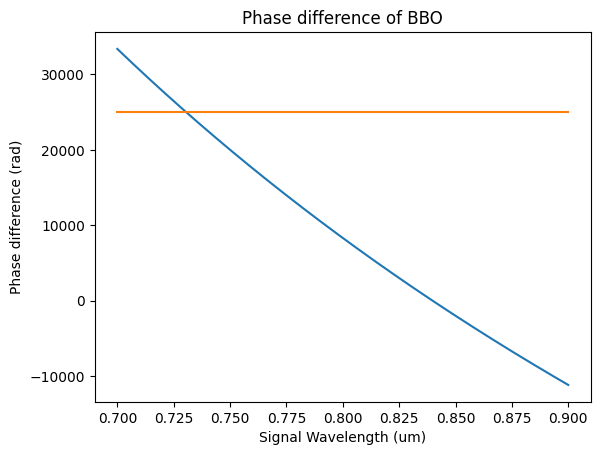

In [467]:
phase_difference_bbo_2 = 0.5 * 2*np.pi*bbo_2_length*(n_o_signal_bbo/signal_wavelength - n_e_idler_bbo/idler_wavelength) # rad
# plot the phase difference
plt.plot(signal_wavelength, phase_difference_bbo_2)
plt.plot(signal_wavelength, phase_difference_bbo_1*np.ones_like(signal_wavelength))
plt.xlabel('Signal Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Phase difference of BBO')
plt.show()

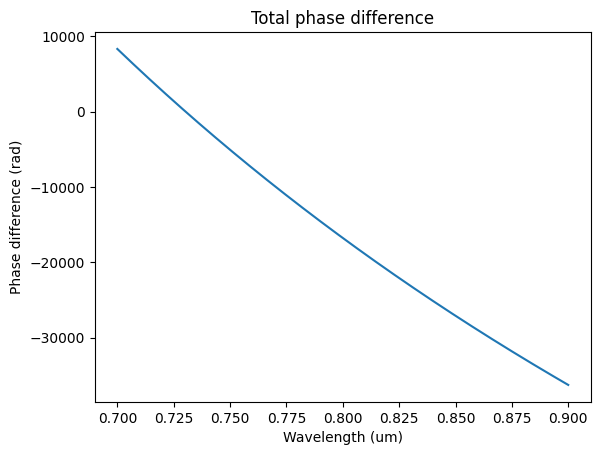

In [468]:
# Difference of the phase differences
total_phase_difference = phase_difference_bbo_2 - phase_difference_bbo_1
plt.plot(signal_wavelength, total_phase_difference)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Total phase difference')
plt.show()


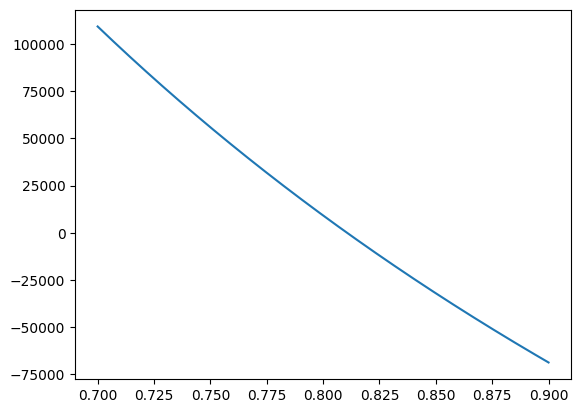

In [469]:
total_phase_difference = 2 * np.pi * (
    (
        2 * bbo_2_length * n_e_signal_bbo / signal_wavelength
        - 2 * bbo_2_length * n_o_idler_bbo / idler_wavelength
    )
    - (
        bbo_1_length * n_e_pump_bbo / pump_wavelength
        - bbo_1_length * n_o_pump_bbo / pump_wavelength
    )
)
plt.plot(signal_wavelength, total_phase_difference)

In [470]:
pump_wavelength = 405e-3 # um

signal_wavelength = 810e-3 # um
idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um
idler_wavelength

length_2 = 13.76
phase_1 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(signal_wavelength, 'e') / signal_wavelength - 13 * bbo_sellmeier_n(pump_wavelength, 'e') / pump_wavelength)
phase_2 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(idler_wavelength, 'o') / idler_wavelength - 13 * bbo_sellmeier_n(pump_wavelength, 'o') / pump_wavelength)
phase_1 - phase_2

np.float64(0.5097381689652867)

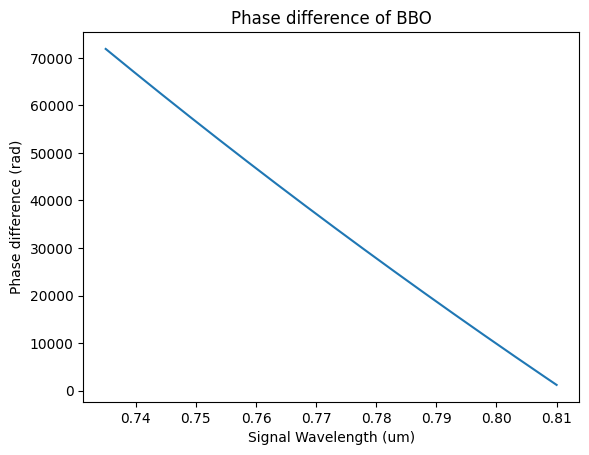

In [471]:
pump_wavelength = 405.4e-3 # um

signal_wavelength = np.linspace(735e-3, 810e-3, 1000) # um
idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

length_2 = 13.76e3
phase_1 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(signal_wavelength, 'e') / signal_wavelength - 13e3 * bbo_sellmeier_n(pump_wavelength, 'e') / pump_wavelength)
phase_2 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(idler_wavelength, 'o') / idler_wavelength - 13e3 * bbo_sellmeier_n(pump_wavelength, 'o') / pump_wavelength)
plt.plot(signal_wavelength, (phase_1 - phase_2))
plt.xlabel('Signal Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Phase difference of BBO')
plt.show()

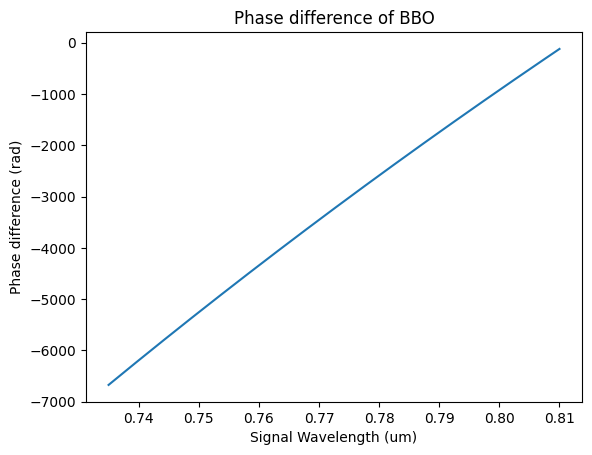

In [472]:
pump_wavelength = 405.4e-3 # um

signal_wavelength = np.linspace(735e-3, 810e-3, 1000) # um
idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

length_2 = 13.76
phase_1 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(signal_wavelength, 'e') / signal_wavelength - 13 * bbo_sellmeier_n(pump_wavelength, 'e') / pump_wavelength)
phase_2 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(idler_wavelength, 'o') / idler_wavelength - 13 * bbo_sellmeier_n(pump_wavelength, 'o') / pump_wavelength)

yvo_1_length = 780 # um
yvo_2_length = 970 # um

phase_3 = 2 * np.pi * (2 * yvo_2_length * yvo_sellmeier_n(signal_wavelength, 'e') / signal_wavelength - yvo_1_length * yvo_sellmeier_n(pump_wavelength, 'e') / pump_wavelength)
phase_4 = 2 * np.pi * (2 * yvo_2_length * yvo_sellmeier_n(idler_wavelength, 'o') / idler_wavelength - yvo_1_length * yvo_sellmeier_n(pump_wavelength, 'o') / pump_wavelength)

plt.plot(signal_wavelength, (phase_1 - phase_2 - phase_3 + phase_4))
plt.xlabel('Signal Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Phase difference of BBO')
plt.show()

In [473]:
pump_wavelength = np.linspace(405e-3, 406e-3, 1000) # um

signal_wavelength = np.linspace(750e-3, 900e-3, 1000) # um
signal_wavelength = np.array([signal_wavelength]*np.size(pump_wavelength)).T
idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

length_2 = 13.76
phase_1 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(signal_wavelength, 'e') / signal_wavelength - 13 * bbo_sellmeier_n(pump_wavelength, 'e') / pump_wavelength)
phase_2 = 2 * np.pi * (2 * length_2 * bbo_sellmeier_n(idler_wavelength, 'o') / idler_wavelength - 13 * bbo_sellmeier_n(pump_wavelength, 'o') / pump_wavelength)

phase_difference = phase_1 - phase_2
phase_difference = phase_difference

phase_difference

array([[ 55.94247362,  55.94417405,  55.94587448, ...,  57.63358215,
         57.63527412,  57.63696607],
       [ 55.79269047,  55.79439091,  55.79609135, ...,  57.48380854,
         57.48550051,  57.48719248],
       [ 55.64296728,  55.64466773,  55.64636817, ...,  57.33409488,
         57.33578686,  57.33747884],
       ...,
       [-68.59393357, -68.59222369, -68.59051382, ..., -66.89346683,
        -66.89176554, -66.89006426],
       [-68.69808804, -68.69637815, -68.69466827, ..., -66.99761231,
        -66.99591102, -66.99420973],
       [-68.80220787, -68.80049797, -68.79878808, ..., -67.10172316,
        -67.10002185, -67.09832055]], shape=(1000, 1000))

Text(0.5, 1.0, 'Phase difference of BBO')

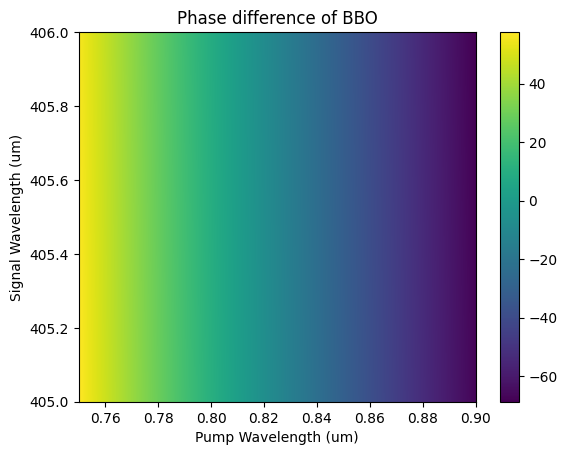

In [474]:
# plot the 1000 by 1000 matrix
plt.imshow(phase_difference.T, extent=[0.75, 0.9, 405, 406], aspect='auto')
plt.colorbar()
plt.xlabel('Pump Wavelength (um)')
plt.ylabel('Signal Wavelength (um)')
plt.title('Phase difference of BBO')




# Uncompensated (2nd attempt)

In [475]:
pump_wavelength = 405.4e-3 # um
signal_wavelength = 810e-3 # um
idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

n_e_p = bbo_sellmeier_n(pump_wavelength, 'e')
n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')

n_e_s = bbo_sellmeier_n(signal_wavelength, 'e')
n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')

n_e_i = bbo_sellmeier_n(idler_wavelength, 'e')
n_o_i = bbo_sellmeier_n(idler_wavelength, 'o')

n_e_p, n_o_p, n_e_s, n_o_s, n_e_i, n_o_i

(np.float64(1.5679055359933507),
 np.float64(1.6922155474070197),
 np.float64(1.5459940320704677),
 np.float64(1.6610724058370865),
 np.float64(1.5459642342288178),
 np.float64(1.6610251143798138))

In [476]:
l_1 = 13e3 # um
l_2 = 13.76e3 # um # from paper

phase_1 = 2 * np.pi * (2 * l_2 * n_e_s / signal_wavelength - l_1 * n_e_p / pump_wavelength)
phase_2 = 2 * np.pi * (2 * l_2 * n_o_i / idler_wavelength - l_1 * n_o_p / pump_wavelength)

phase_1 - phase_2

np.float64(1190.0892626686164)

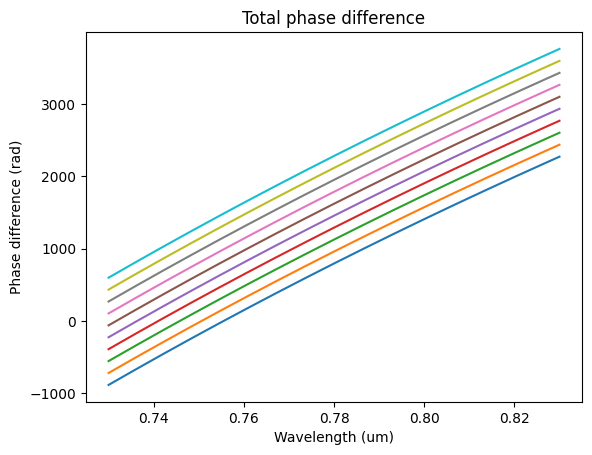

In [477]:
l_1_range = [13e3] #np.linspace(12.7e3, 12.8e3, 10) # um
l_2_range = np.linspace(13.25e3, 13.28e3, 10) # um

for l_1 in l_1_range:
    for l_2 in l_2_range:
        signal_wavelength = np.linspace(730e-3, 830e-3, 1000) # um
        idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

        phase_1 = 2 * np.pi * (2 * l_2 * n_e_s / signal_wavelength - l_1 * n_e_p / pump_wavelength)
        phase_2 = 2 * np.pi * (2 * l_2 * n_o_i / idler_wavelength - l_1 * n_o_p / pump_wavelength)

        total_phase_difference = phase_1 + phase_2
        # plt.plot(signal_wavelength, phase_1)
        # plt.plot(signal_wavelength, phase_2)
        plt.plot(signal_wavelength, total_phase_difference)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Total phase difference')
plt.show()


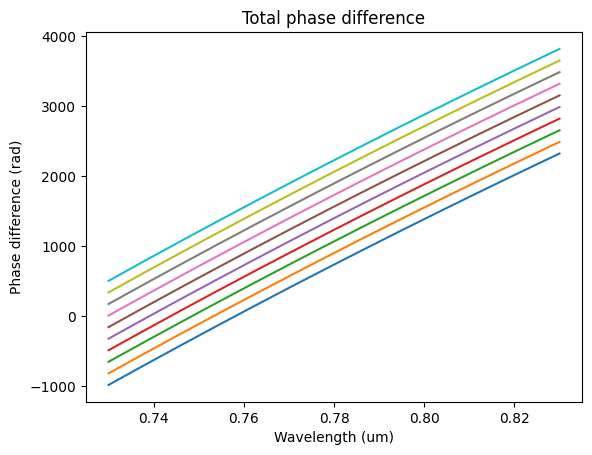

In [478]:
l_1_range = [13e3] #np.linspace(12.7e3, 12.8e3, 10) # um
l_2_range = np.linspace(13.25e3, 13.28e3, 10) # um

pump_wavelength = 405.4e-3 # um

for l_1 in l_1_range:
    for l_2 in l_2_range:
        signal_wavelength = np.linspace(730e-3, 830e-3, 1000) # um
        idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

        n_e_s = bbo_sellmeier_n(signal_wavelength, 'e')
        n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')
        n_e_i = bbo_sellmeier_n(idler_wavelength, 'e')
        n_o_i = bbo_sellmeier_n(idler_wavelength, 'o')
        n_e_p = bbo_sellmeier_n(pump_wavelength, 'e')
        n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')

        phase_1 = 2 * np.pi * (2 * l_2 * n_e_s / signal_wavelength - l_1 * n_o_p / pump_wavelength)
        phase_2 = 2 * np.pi * (2 * l_2 * n_o_i / idler_wavelength - l_1 * n_e_p / pump_wavelength)

        total_phase_difference = phase_1 + phase_2
        # plt.plot(signal_wavelength, phase_1)
        # plt.plot(signal_wavelength, phase_2)
        plt.plot(signal_wavelength, total_phase_difference)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Total phase difference')
plt.show()


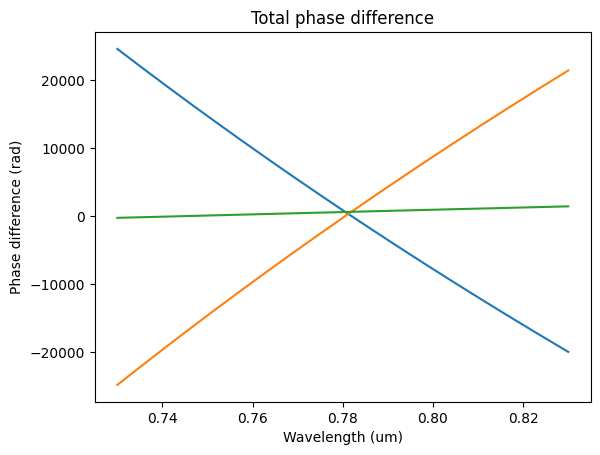

In [479]:
l_1_range = [13e3] #np.linspace(12.7e3, 12.8e3, 10) # um
l_2_range = [13.25e3] # np.linspace(13.25e3, 13.28e3, 10) # um

pump_wavelength = 405.4e-3 # um

for l_1 in l_1_range:
    for l_2 in l_2_range:
        signal_wavelength = np.linspace(730e-3, 830e-3, 1000) # um
        idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

        n_e_s = bbo_sellmeier_n(signal_wavelength, 'e')
        n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')
        n_e_i = bbo_sellmeier_n(idler_wavelength, 'e')
        n_o_i = bbo_sellmeier_n(idler_wavelength, 'o')
        n_e_p = bbo_sellmeier_n(pump_wavelength, 'e')
        n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')

        n_eff_s = np.sqrt(2 * n_e_s**2 * n_o_s**2 / (n_e_s**2 + n_o_s**2))
        n_eff_p = np.sqrt(2 * n_e_p**2 * n_o_p**2 / (n_e_p**2 + n_o_p**2))

        phase_1 = 2 * np.pi * (2 * l_2 * n_eff_s / signal_wavelength - l_1 * n_o_p / pump_wavelength)
        phase_2 = 2 * np.pi * (2 * l_2 * n_o_i / idler_wavelength - l_1 * n_eff_p / pump_wavelength)

        total_phase_difference = phase_1 + phase_2
        plt.plot(signal_wavelength, phase_1)
        plt.plot(signal_wavelength, phase_2)
        plt.plot(signal_wavelength, total_phase_difference)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Total phase difference')
plt.show()


https://opg.optica.org/ao/fulltext.cfm?uri=ao-44-6-866&id=82633#f1

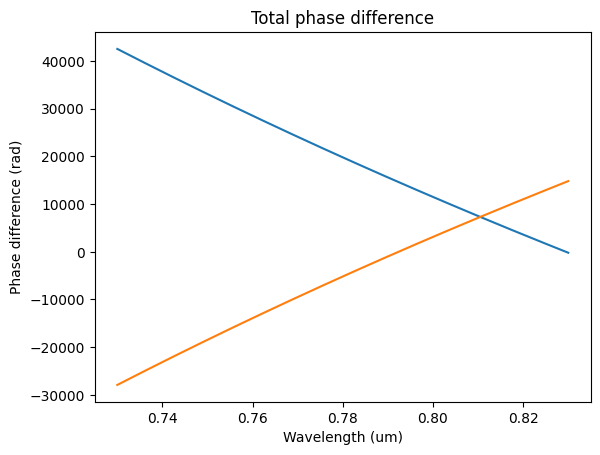

In [480]:
l_1_range = [13e3] #np.linspace(12.7e3, 12.8e3, 10) # um
l_2_range = [13.8e3] # np.linspace(13.25e3, 13.28e3, 10) # um

pump_wavelength = 405.4e-3 # um

for l_1 in l_1_range:
    for l_2 in l_2_range:
        signal_wavelength = np.linspace(730e-3, 830e-3, 1000) # um
        idler_wavelength = 1/(1/pump_wavelength - 1/signal_wavelength) # um

        n_e_s = bbo_sellmeier_n(signal_wavelength, 'e')
        n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')
        n_e_i = bbo_sellmeier_n(idler_wavelength, 'e')
        n_o_i = bbo_sellmeier_n(idler_wavelength, 'o')
        n_e_p = bbo_sellmeier_n(pump_wavelength, 'e')
        n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')

        n_eff_s = np.sqrt(2 * n_e_s**2 * n_o_s**2 / (n_e_s**2 + n_o_s**2))
        n_eff_i = np.sqrt(2 * n_e_i**2 * n_o_i**2 / (n_e_i**2 + n_o_i**2))
        n_eff_p = np.sqrt(2 * n_e_p**2 * n_o_p**2 / (n_e_p**2 + n_o_p**2))

        k_o_1 = 2 * np.pi / pump_wavelength * np.sqrt(n_o_p**2 - 1/2) # sin^2(45) = 1/2
        k_e_1 = 2 * np.pi / pump_wavelength * np.sqrt(n_eff_p**2 - 1/2) # sin^2(45) = 1/2

        k_o_2 = 2 * np.pi / signal_wavelength * np.sqrt(n_o_s**2 - 1/2) # sin^2(45) = 1/2
        k_e_2 = 2 * np.pi / idler_wavelength * np.sqrt(n_eff_i**2 - 1/2)
        phase_1 = 2 * np.pi * (2 * l_2 * n_eff_s / signal_wavelength - l_1 * n_o_p / pump_wavelength)
        phase_2 = 2 * np.pi * (2 * l_2 * n_o_i / idler_wavelength - l_1 * n_eff_p / pump_wavelength)

        phase_1 = l_1 * (k_o_1 - k_e_1)
        phase_2 = l_2 * (k_o_2 - k_e_2)


        total_phase_difference = phase_1 - phase_2
        # plt.plot(signal_wavelength, phase_1)
        plt.plot(signal_wavelength, phase_2)
        plt.plot(signal_wavelength, total_phase_difference)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Total phase difference')
plt.show()


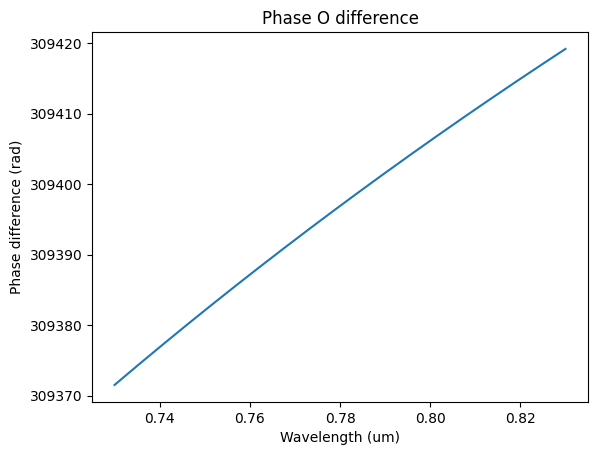

In [ ]:
k_p = 2 * np.pi / pump_wavelength
k_s = 2 * np.pi / signal_wavelength

n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')
n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')

k_o_p = k_p * np.sqrt(n_o_p**2 - 1/2)
k_o_s = k_s * np.sqrt(n_o_s**2 - 1/2)

l_1 = 13e3
l_2 = 13.76e3

phase_o = l_1 * k_o_p - 2 * l_2 * k_o_s

plt.plot(signal_wavelength, phase_o)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Phase O difference')
plt.show()

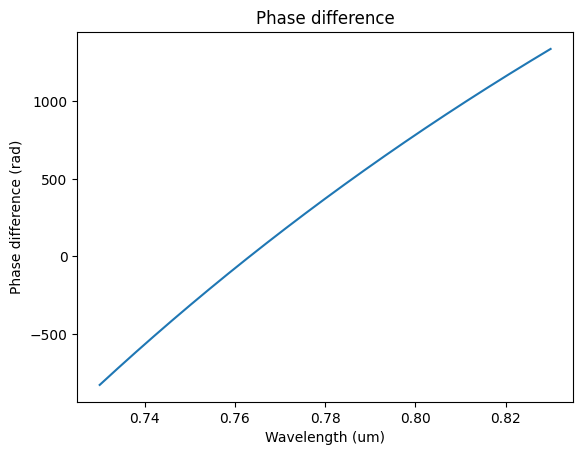

In [514]:
k_p = 2 * np.pi / pump_wavelength
k_s = 2 * np.pi / signal_wavelength

n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')
n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')

k_o_p = k_p * np.sqrt(n_o_p**2 - 1/2)
k_o_s = k_s * np.sqrt(n_o_s**2 - 1/2)

l_1 = 13e3
l_2 = 13.58e3 #13.76e3

phase_o = l_1 * k_o_p - 2 * l_2 * k_o_s

k_p = 2 * np.pi / pump_wavelength
k_i = 2 * np.pi / idler_wavelength

n_e_p = bbo_sellmeier_n(pump_wavelength, 'e')
n_e_i = bbo_sellmeier_n(idler_wavelength, 'e')
n_o_i = bbo_sellmeier_n(idler_wavelength, 'o')

n_eff_i = np.sqrt(2 * n_e_i**2 * n_o_i**2 / (n_e_i**2 + n_o_i**2))

k_e_p = k_p * np.sqrt(n_o_p**2 - 1/2)
k_e_i = k_i * np.sqrt(n_eff_i**2 - 1/2)


phase_e = l_1 * k_e_p - 2 * l_2 * k_e_i

# plt.plot(signal_wavelength, phase_e)
# plt.plot(signal_wavelength, phase_o)
plt.plot(signal_wavelength, phase_o + phase_e)
plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Phase difference')
plt.show()

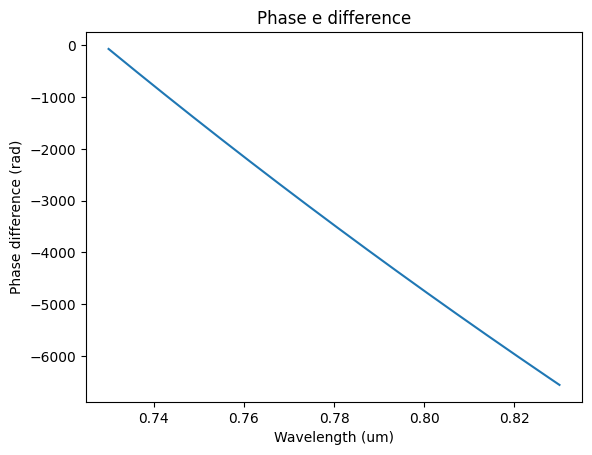

In [521]:
k_p = 2 * np.pi / pump_wavelength
k_s = 2 * np.pi / signal_wavelength

n_o_p = bbo_sellmeier_n(pump_wavelength, 'o')
n_o_s = bbo_sellmeier_n(signal_wavelength, 'o')

k_o_p = k_p * np.sqrt(n_o_p**2 - 1/2)
k_o_s = k_s * np.sqrt(n_o_s**2 - 1/2)

l_1 = 13e3 # um
l_2 = 13.58e3 #13.76e3

phase_o = l_1 * k_o_p - 2 * l_2 * k_o_s

k_p = 2 * np.pi / pump_wavelength
k_i = 2 * np.pi / idler_wavelength

n_e_p = bbo_sellmeier_n(pump_wavelength, 'e')
n_e_i = bbo_sellmeier_n(idler_wavelength, 'e')
n_o_i = bbo_sellmeier_n(idler_wavelength, 'o')

n_eff_i = np.sqrt(2 * n_e_i**2 * n_o_i**2 / (n_e_i**2 + n_o_i**2))

k_e_p = k_p * np.sqrt(n_o_p**2 - 1/2)
k_e_i = k_i * np.sqrt(n_eff_i**2 - 1/2)

phase_e = l_1 * k_e_p - 2 * l_2 * k_e_i


k_o_yvo_p = k_p * yvo_sellmeier_n(pump_wavelength, 'o')
k_e_yvo_p = k_p * yvo_sellmeier_n(pump_wavelength, 'e')

k_o_yvo_s = k_s * yvo_sellmeier_n(signal_wavelength, 'o')
k_e_yvo_i = k_i * yvo_sellmeier_n(idler_wavelength, 'e')

l_1_yvo = 780 # um
l_2_yvo = 970 # um

phase_yvo_pre = l_1_yvo * k_o_yvo_p - l_1_yvo * k_e_yvo_p
phase_yvo_post = 2 * l_2_yvo * k_o_yvo_s - 2 * l_2_yvo * k_e_yvo_i

# plt.plot(signal_wavelength, phase_e)
# plt.plot(signal_wavelength, phase_o)
plt.plot(signal_wavelength, phase_o + phase_e + phase_yvo_pre + phase_yvo_post)
# plt.plot(signal_wavelength, phase_o)
# plt.plot(signal_wavelength, phase_e)
# plt.plot(signal_wavelength, phase_yvo_pre)
# plt.plot(signal_wavelength, phase_yvo_post)

plt.xlabel('Wavelength (um)')
plt.ylabel('Phase difference (rad)')
plt.title('Phase e difference')
plt.show()